In [1]:
import numpy as np
import torch
import pandas as pd
from IPython.display import Audio
import seaborn as sns
import tqdm
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
sns.set()

%load_ext autoreload
%autoreload 2

In [2]:
import utils
import models
import trainer

In [3]:
class conf:
    # Preprocessing settings
    sampling_rate = 44100
    duration = 2
#     hop_length = 347*duration # to make time steps 128
    hop_length = 694*duration
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    samples = sampling_rate * duration

In [4]:
conf.columns, conf.column_encoder = utils.read_columns()

In [5]:
all_x, all_y, _ = torch.load("./train_curated_preprocessed.tc")

In [6]:
np.random.seed(42)
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.1)

In [7]:
train_dataset = trainer.SoundDataset(train_x, train_y)
test_dataset = trainer.SoundDataset(test_x, test_y)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=trainer.collate_fn, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, collate_fn=trainer.collate_fn, shuffle=True)

In [9]:
device = torch.device("cuda")
model = models.Net(128, all_x[0].shape[-1], 80)
# model = models.LSTMModel(128, 80)
model = model.to(device)

In [10]:
tr = trainer.Trainer(model, torch.optim.Adam, device, {"path":"./experiments/lstm/"})

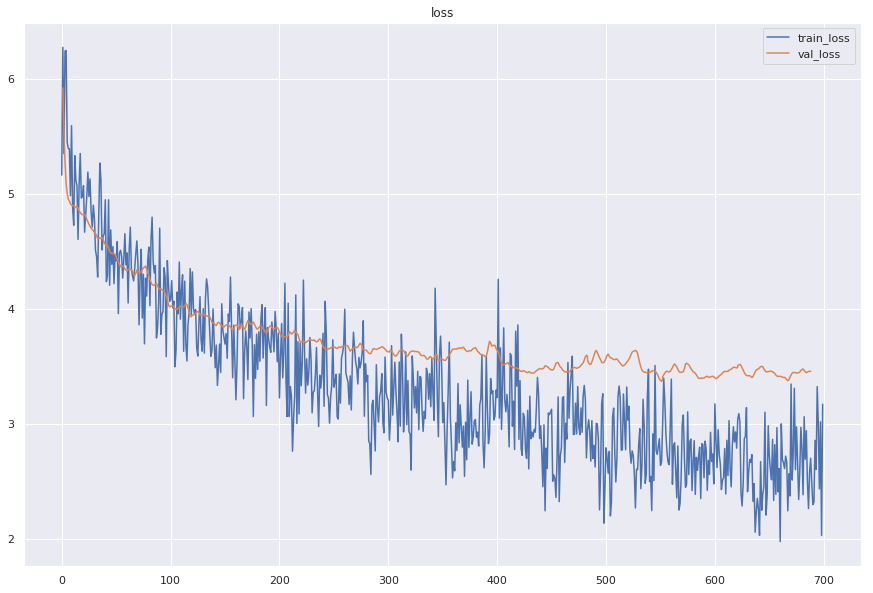

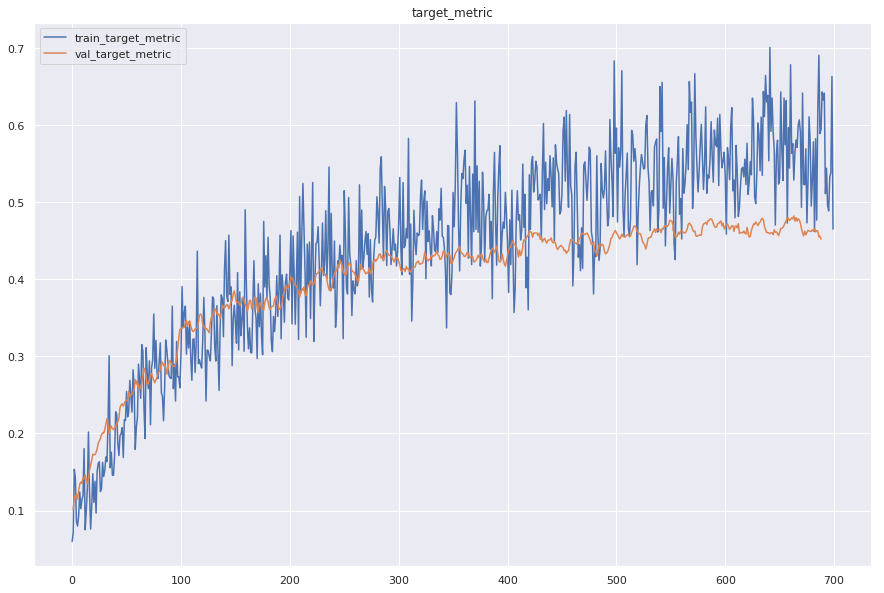

In [11]:
tr.train(
    loaders={"train_loader":train_loader, "test_loader":test_loader},
    params={"epochs":10, "grad_clip_norm":10.0, "validate_every":25},
)